In [2]:
import numpy as np
import sys 
import os
import matplotlib.pyplot as plt
from utils import *

In [3]:
os.chdir('./codes')

FileNotFoundError: [Errno 2] No such file or directory: './codes'

In [4]:
save_dir = '/storage/filament/result/'

In [5]:
dens = np.genfromtxt('/storage/filament/256den18a+1024',dtype='float64')
temp = np.genfromtxt('/storage/filament/256den18f+1024',dtype='float64')
xray = np.genfromtxt('/storage/filament/256den18g+1024',dtype='float64')

In [6]:
length = 256
sliced_index = 128

dens_mat = dens.reshape(256,256,256)
xray_mat = xray.reshape(256,256,256)
temp_mat = temp.reshape(256,256,256)

In [8]:
xray_mat_2d_log = np.log10(xray_mat[:,:,sliced_index])
temp_mat_2d_log = np.log10(temp_mat[:,:,sliced_index])

In [10]:
Threshold_xray,_ = Threshold_array(temp_mat_2d_log,xray_mat_2d_log,4,-15) 
np.min(Threshold_xray),np.min(xray_mat_2d_log)

(-15.0, -13.512495387227213)

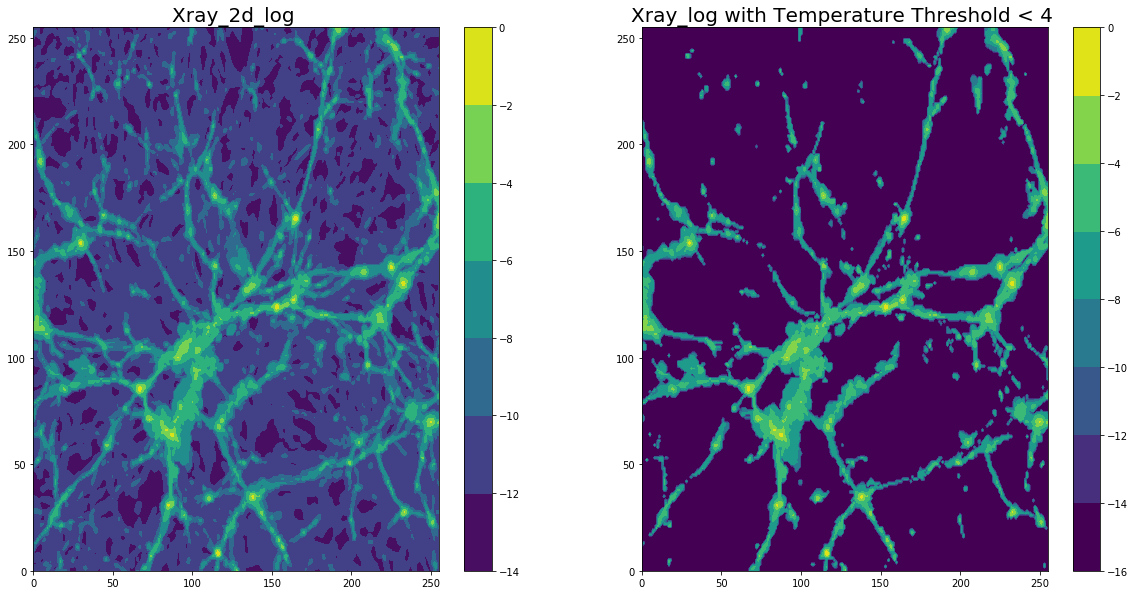

In [11]:
plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
plt.contourf(xray_mat_2d_log)
plt.title('Xray_2d_log ',fontsize = 20)
plt.colorbar()
plt.clim(np.min(xray_mat_2d_log),np.max(xray_mat_2d_log))

plt.subplot(1,2,2)
plt.contourf(Threshold_xray)
plt.title('Xray_log with Temperature Threshold < 4 ', fontsize = 20)
plt.colorbar()
plt.clim(np.min(Threshold_xray),np.max(Threshold_xray))


title_fig = 'Xray figure with temperature threshold'


save_result(save_dir,title_fig)



In [12]:
peak_indexing = np.genfromtxt('/storage/filament/Cinfo.dat')

z_peak_all=peak_indexing[:,3]

x_peak=[]
y_peak=[]
z_peak=[]

#x_peak = peak_indexing[:,1]
#y_peak = peak_indexing[:,2]
#z_peak = peak_indexing[:,3]

In [13]:
for index,z_value in enumerate(z_peak_all):
    if ( (peak_indexing[index,1] > 0 and peak_indexing[index,1] <257 )  and  (peak_indexing[index,2] > 0 and peak_indexing[index,2]< 257) and 
        (peak_indexing[index,3] > 0 and peak_indexing[index,3] < 257)):
        print(peak_indexing[index,1],peak_indexing[index,2],z_value)
        x_peak.append(int(peak_indexing[index,1]))
        y_peak.append(int(peak_indexing[index,2]))
        z_peak.append(int(z_value))
    else:
        pass
    


38.0 109.0 31.0
117.0 104.0 37.0
224.0 25.0 66.0
86.0 149.0 74.0
115.0 33.0 92.0
120.0 113.0 95.0
137.0 91.0 95.0
114.0 126.0 113.0
120.0 114.0 113.0
105.0 58.0 115.0
98.0 129.0 122.0
99.0 163.0 126.0
106.0 74.0 129.0
156.0 123.0 131.0
105.0 250.0 152.0


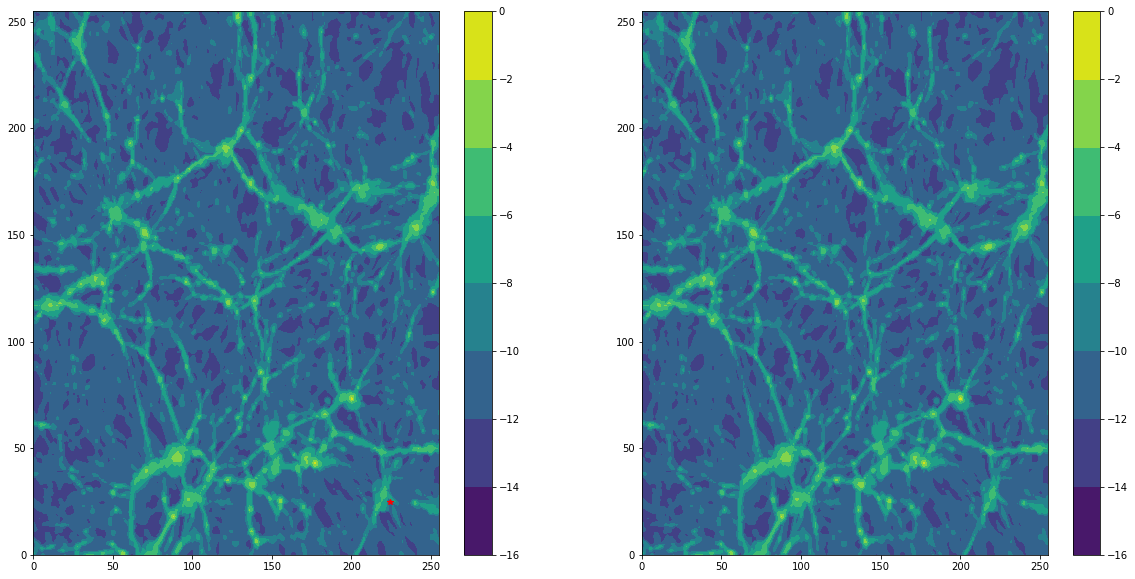

In [25]:
xray_mat = xray.reshape(256,256,256)
xray_peak_test = np.log10(xray_mat[:,:,z_peak[2]])

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.contourf(xray_peak_test)
plt.colorbar()

plt.plot(x_peak[2],y_peak[2],'r*')
plt.subplot(1,2,2)
plt.contourf(xray_peak_test)
plt.colorbar()

title_fig = 'Xray figure with temperature threshold'


save_result(save_dir,title_fig)


In [97]:
volume_constant = (10**-2)*( (200/2048) * (3.086/0.7))**3

In [98]:
xray_log_volume = np.log10(xray*volume_constant)

In [99]:
xray_log_volume_threshold = []

In [100]:
for ix in range(len(xray_log_volume)):
    if xray_log_volume[ix] > -6:
        xray_log_volume_threshold.append(xray_log_volume[ix])
    else:
        xray_log_volume_threshold.append(0)
    

In [121]:
xray_mat_log_volume_threshold = np.reshape(xray_log_volume_threshold, [256, 256, 256])
xray_log_volume_mat = np.reshape(xray_log_volume,[256,256,256])
xray_log_volume_mat = xray_log_volume_mat[:,:,sliced_index]

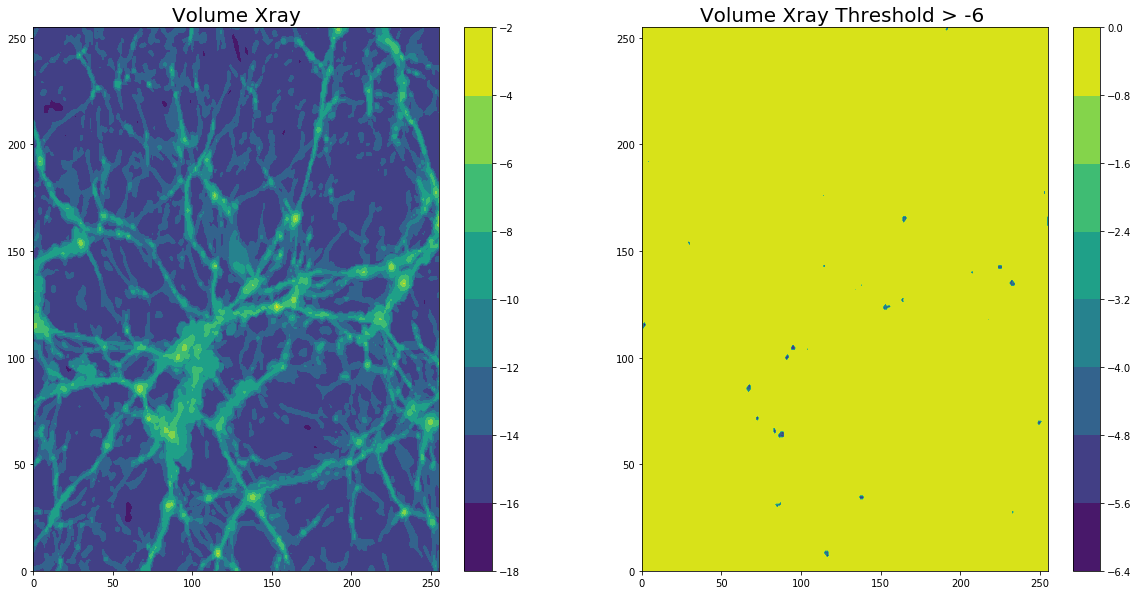

In [158]:
plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
plt.contourf(xray_log_volume_mat)
plt.colorbar()
plt.title('Volume Xray',fontsize=20)

plt.subplot(1,2,2)
plt.contourf(xray_mat_log_volume_threshold[:,:,sliced_index])
plt.colorbar()
plt.title('Volume Xray Threshold > -6 ',fontsize=20)

title_fig = 'Volume Xray Threshold > -6 to see xray peak'


save_result(save_dir,title_fig)


In [111]:
xray_log_volume_mat_xray_log_volume_mat.shape

(256, 256, 256)

In [143]:
peak = np.zeros(xray_mat_2d_log.shape)

peak_candidate = np.zeros(xray_mat_2d_log.shape)
dens_mat_2d = dens_mat[:,:,sliced_index]


threshold = -6


clusters = []
count_threshold =0 
array_ix = []
array_iy = []
#cluster_picture = np.zeros([24,24])

for (ix,iy),value in np.ndenumerate(xray_log_volume_mat):

    if value > threshold:
        print(ix,iy,value)

        count_threshold = count_threshold+1
        
        if ix >= 12 and iy >= 12 and ix <= 255-12 and iy <=255-12:
            cluster_picture = np.zeros([24,24])

            for ixx in range(-12,12):
                for iyy in range(-12,12):
                    cluster_picture[ixx+12,iyy+12] = xray_log_volume_mat[ix+ixx,iy+iyy]
                
        else:
            pass
#             ixx = ix
#             iyy = iy
        array_ix.append(ix)
        array_iy.append(iy)
        clusters.append(cluster_picture) 
        
#        clusters.append(cluster_picture)
        
        




# for (ix,iy),value in np.ndenumerate(xray_mat_2d_log):


#     if value > threshold:
#         try:
#             windowed_mean.append(np.nanmean(dens_mat_2d[-12+ix:ix+12,-12+iy:iy+12]))
#             print(windowed_mean)
                
#             if windowed_mean > window_threshold:
                

#                 peak_candidate.append(windowed_mean)
#                 peak_x.append(ix)
#                 peak_y.append(iy)
#         except:
#             pass

7 116 -5.413768762281269
7 117 -5.98298515602449
8 115 -5.9207728267466395
8 116 -3.829781728963872
8 117 -4.755242164777073
9 115 -5.953447583560633
9 116 -4.389479950902762
9 117 -5.526431311379967
27 233 -5.104916686395799
28 233 -5.072692165357843
30 85 -5.175120984116825
31 84 -5.63726319276774
31 85 -4.5802918591324975
31 86 -5.72201724044759
31 87 -5.195147561195813
32 87 -5.974821231104922
34 137 -5.734644365237994
34 138 -5.03308049777912
34 139 -5.533777041405727
35 137 -5.4165008719223895
35 138 -4.658316766426779
35 139 -5.351604022843666
63 86 -5.649282904356881
63 87 -5.18395304675906
63 88 -5.148205053001651
63 89 -5.937913023805186
64 86 -5.159604095251053
64 87 -4.628742525522414
64 88 -4.676700154957837
64 89 -5.829306592606816
65 83 -5.608337371563385
65 84 -5.632766178555992
65 87 -5.366762453799625
65 88 -5.351070926007378
65 89 -5.812046311189015
66 83 -4.892312066673167
66 84 -4.778939743270327
67 83 -5.657635623918952
69 249 -5.384607254393675
69 250 -5.45706390

In [152]:
clusters_np = np.array(clusters)
clusters_np.shape
#clusters_np[1,0,0]
#clusters_np.shape

(134, 24, 24)

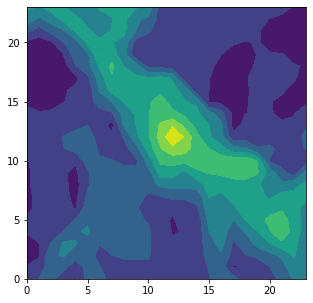

0


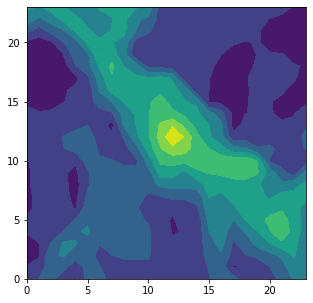

1


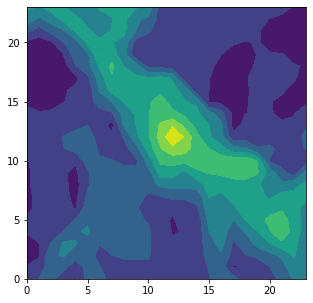

2


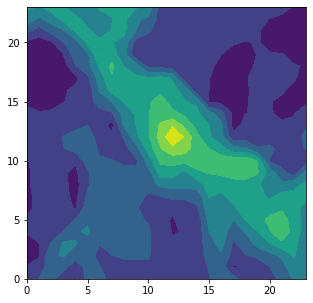

3


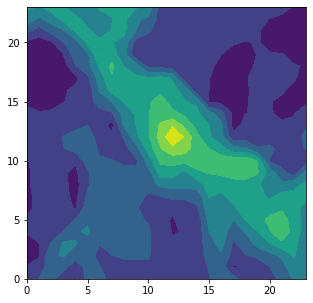

4


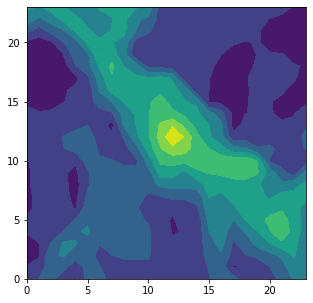

5


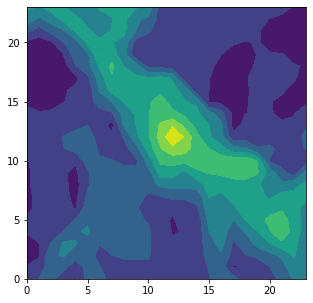

6


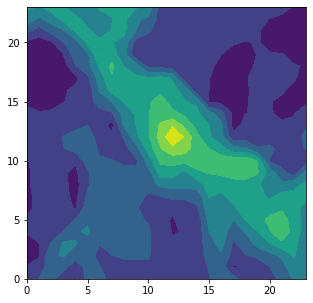

7


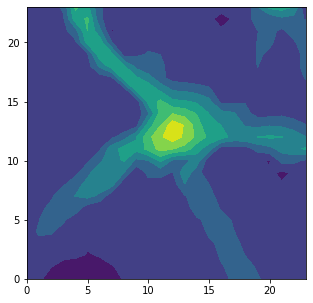

8


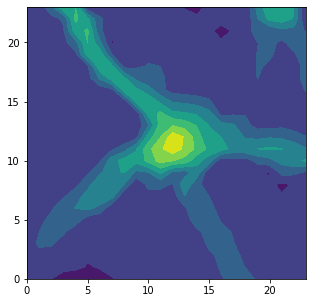

9


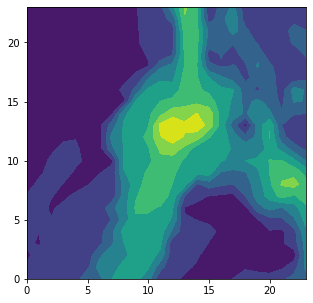

10


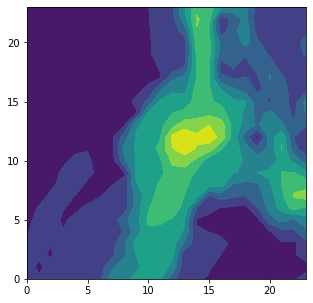

11


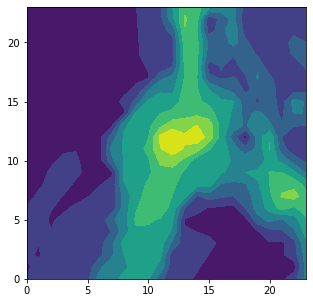

12


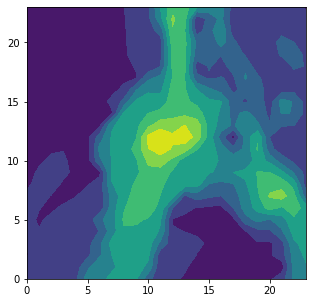

13


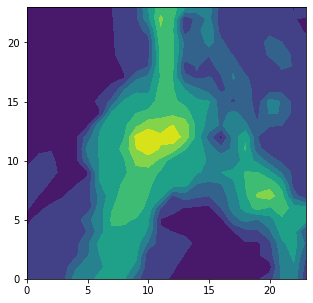

14


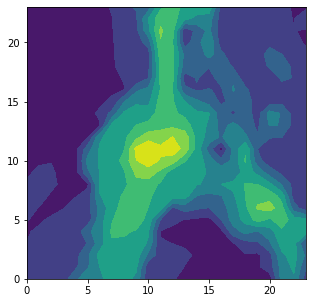

15


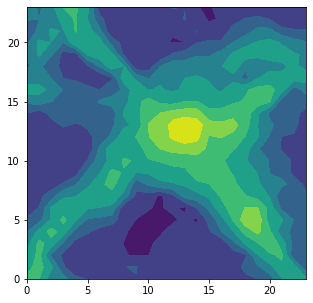

16


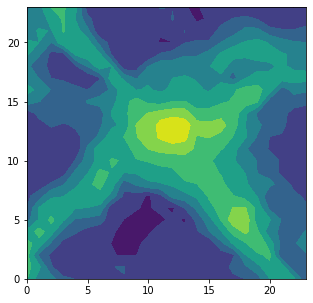

17


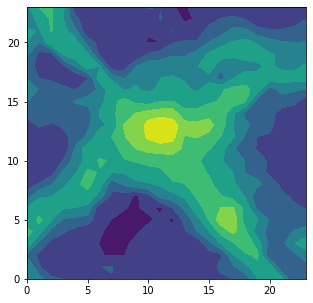

18


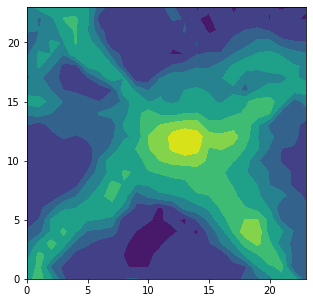

19


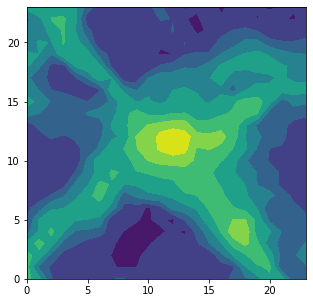

20


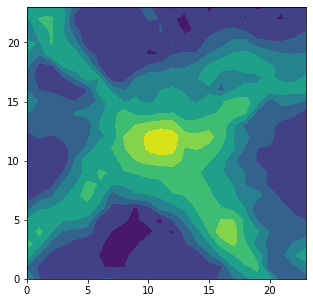

21


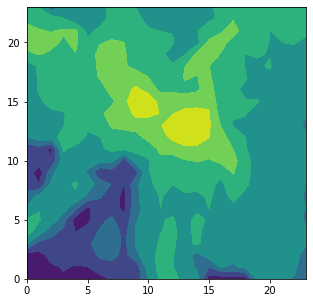

22


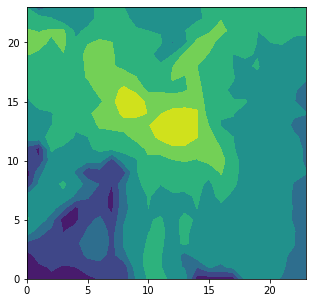

23


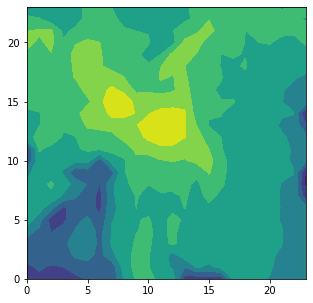

24


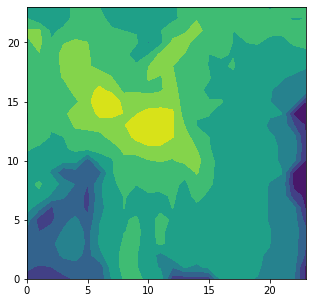

25


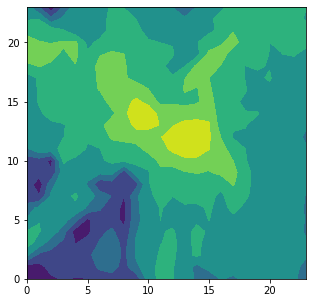

26


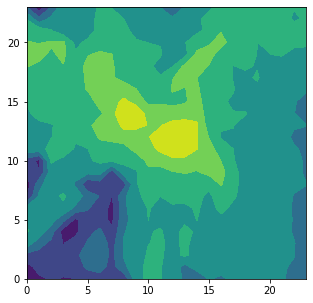

27


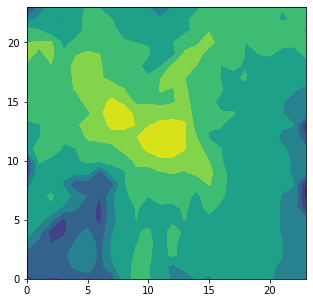

28


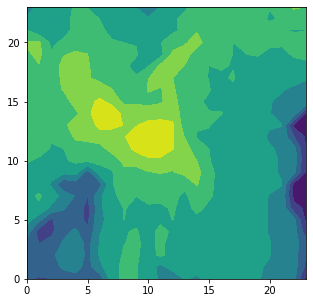

29


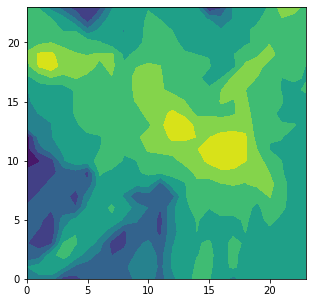

30


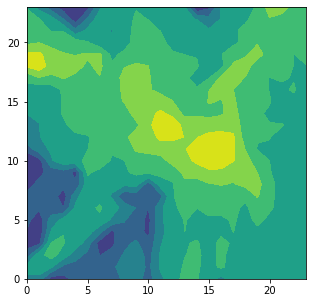

31


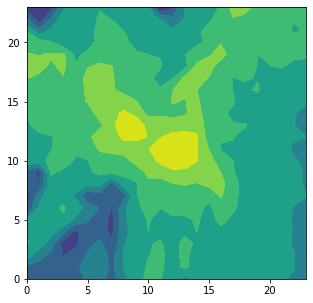

32


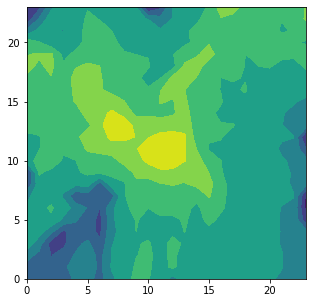

33


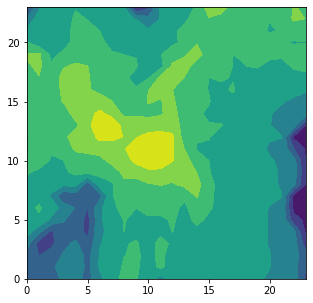

34


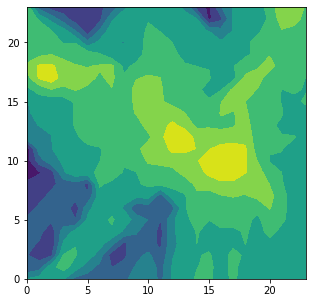

35


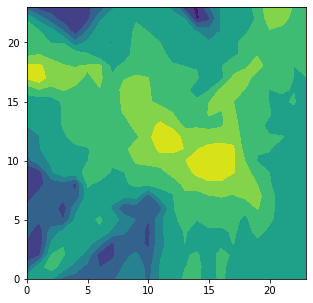

36


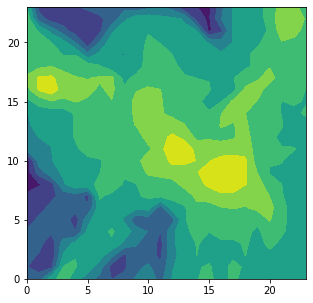

37


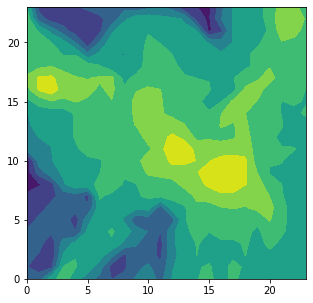

38


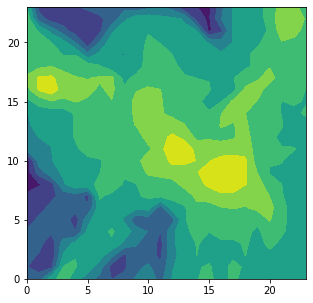

39


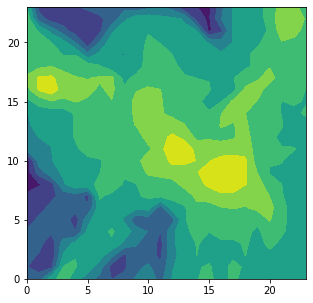

40


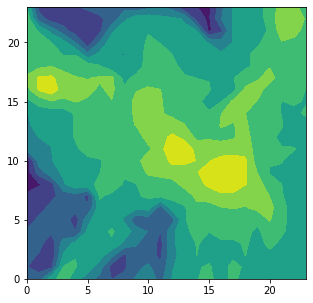

41


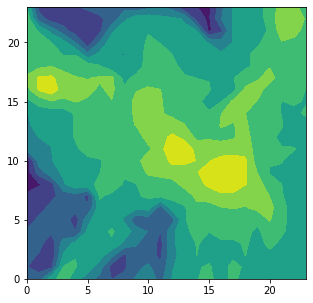

42


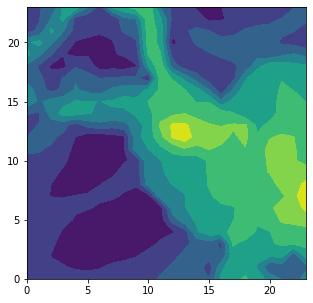

43


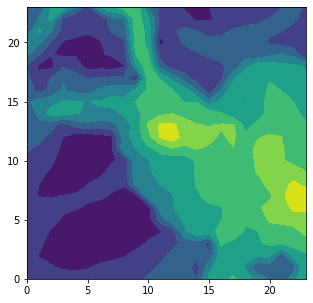

44


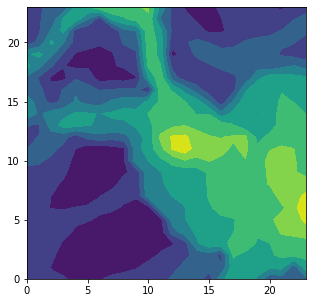

45


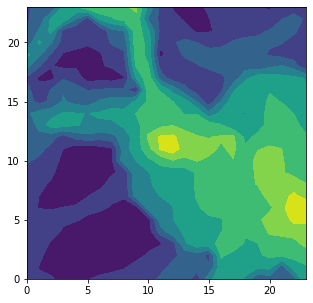

46


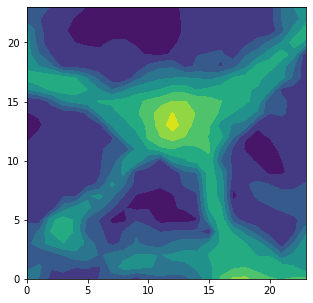

47


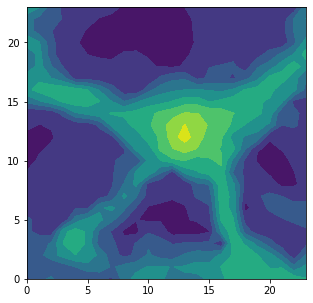

48


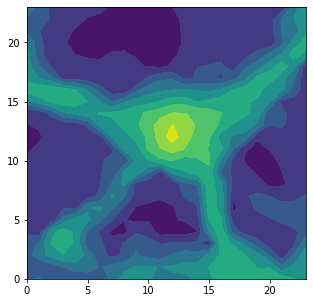

49


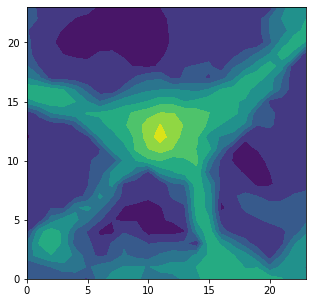

50


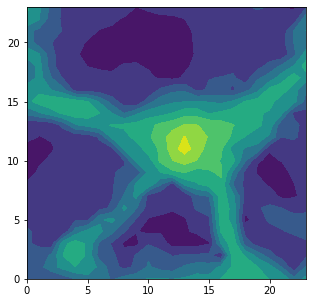

51


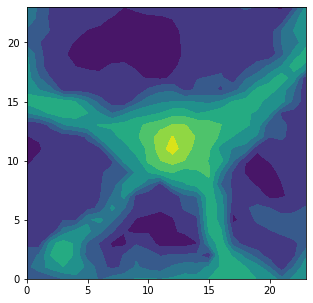

52


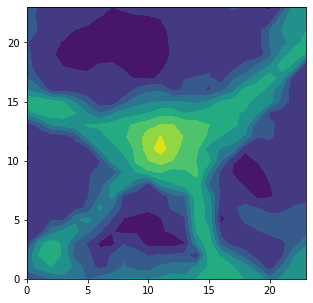

53


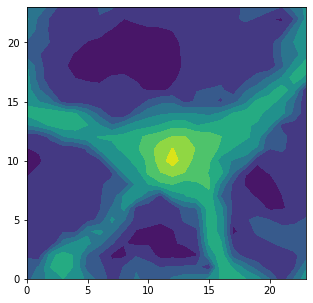

54


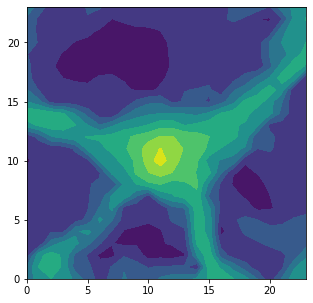

55


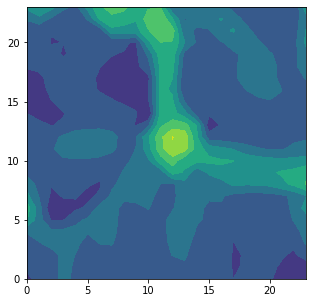

56


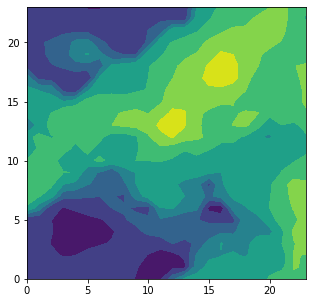

57


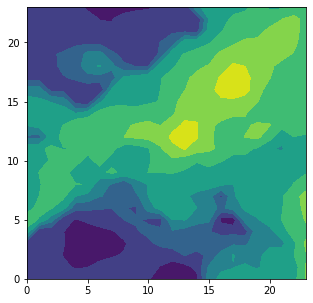

58


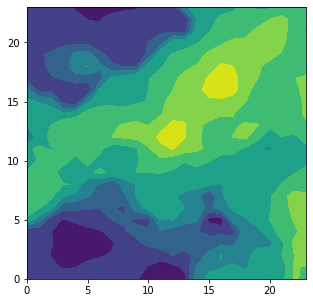

59


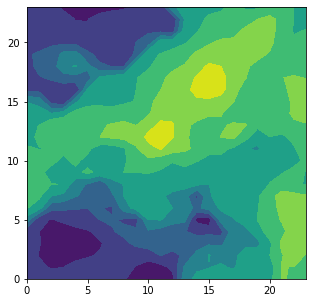

60


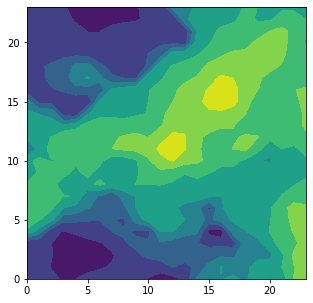

61


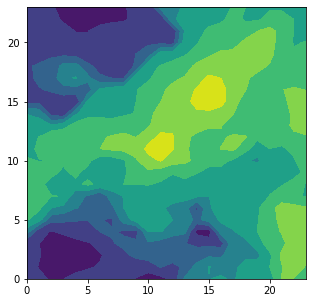

62


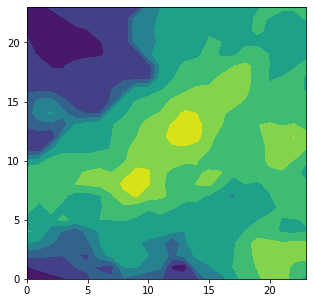

63


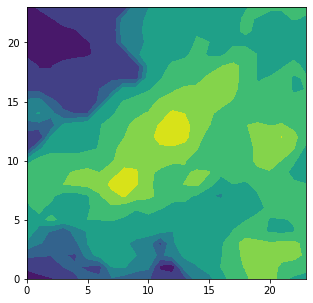

64


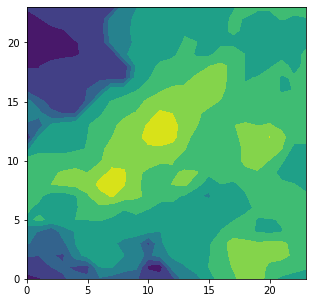

65


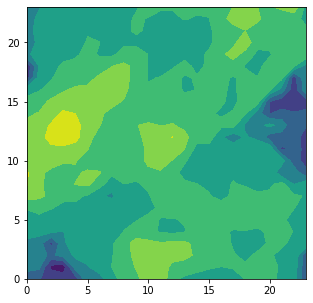

66


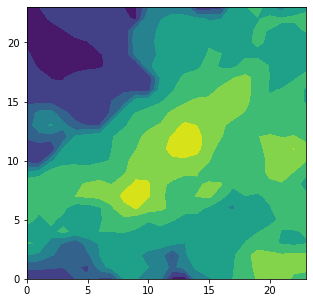

67


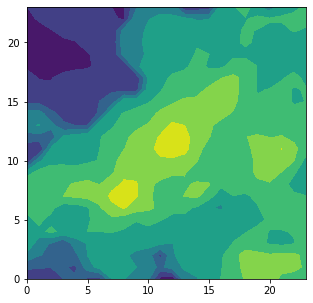

68


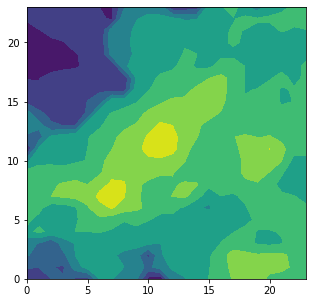

69


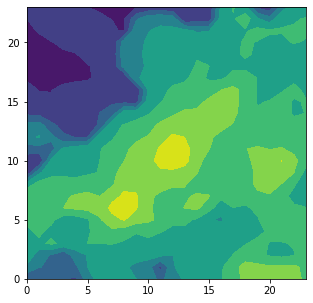

70


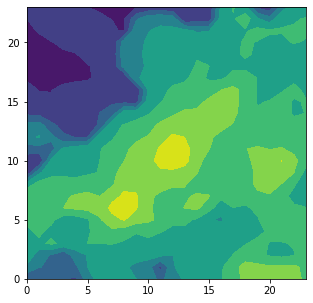

71


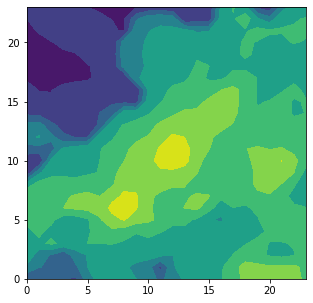

72


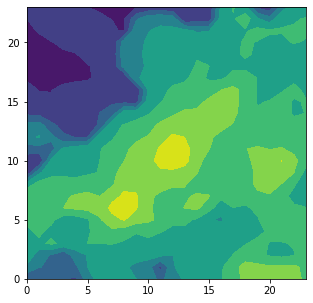

73


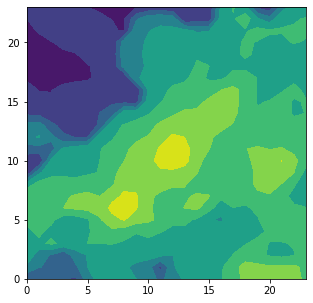

74


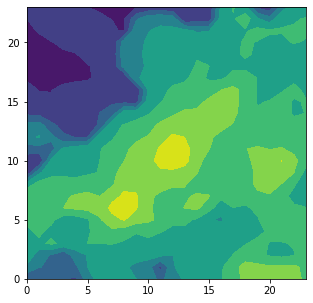

75


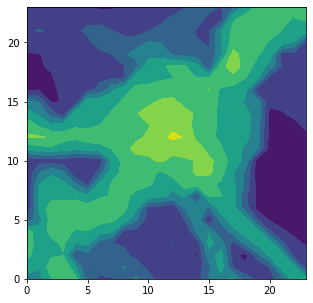

76


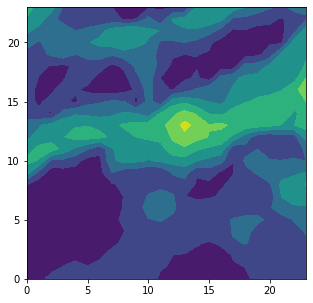

77


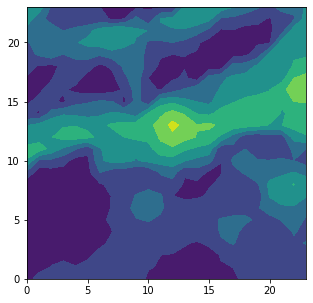

78


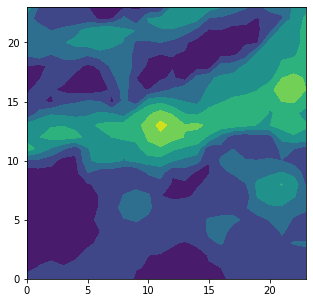

79


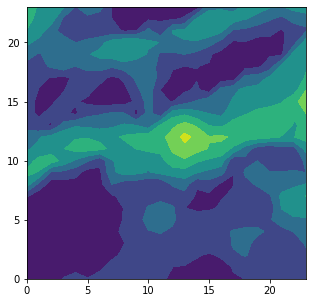

80


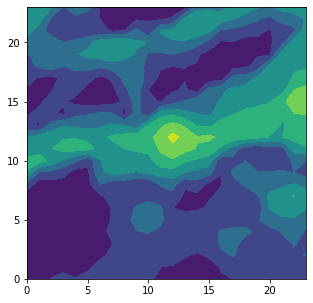

81


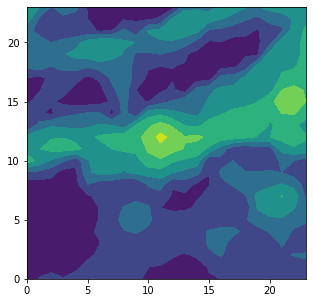

82


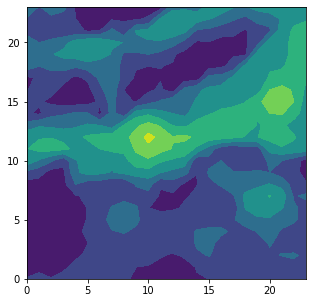

83


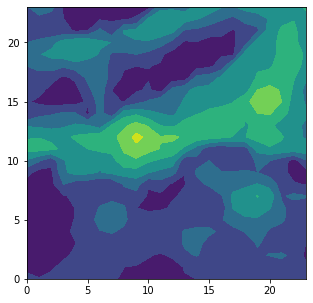

84


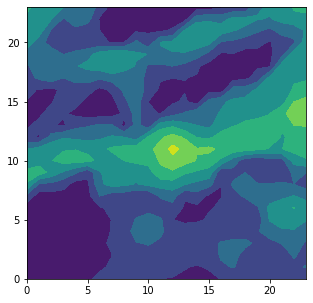

85


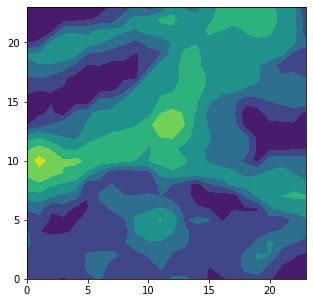

86


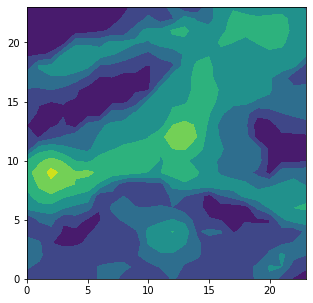

87


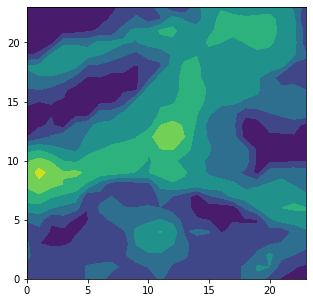

88


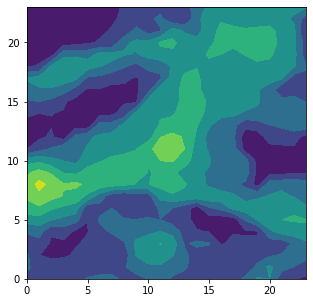

89


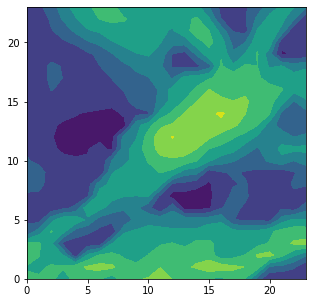

90


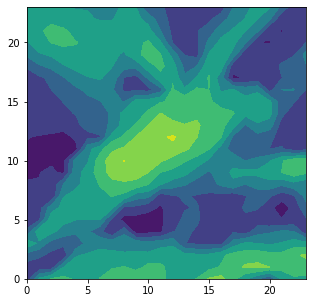

91


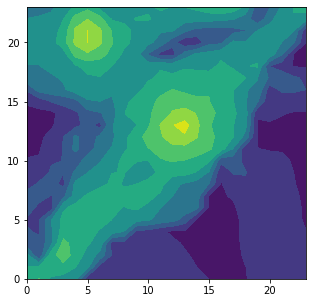

92


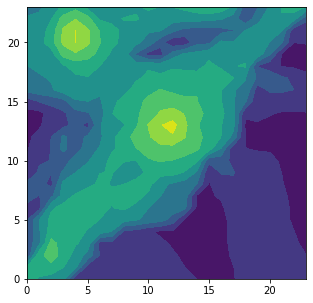

93


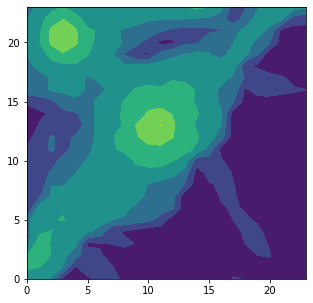

94


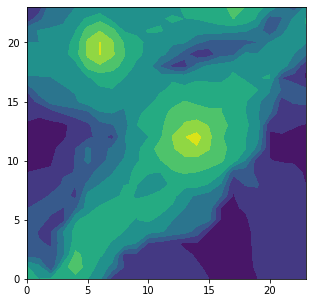

95


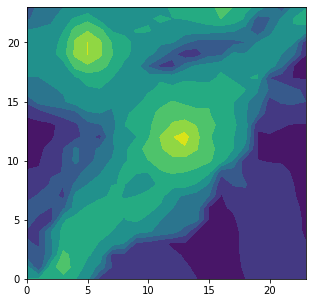

96


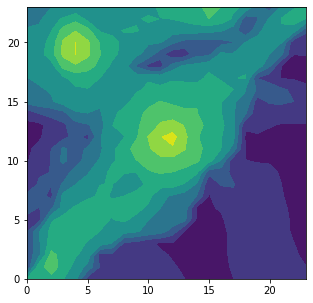

97


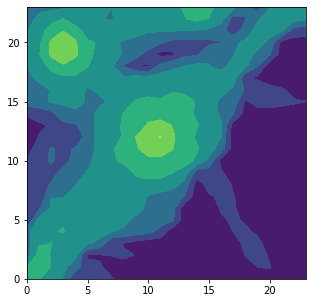

98


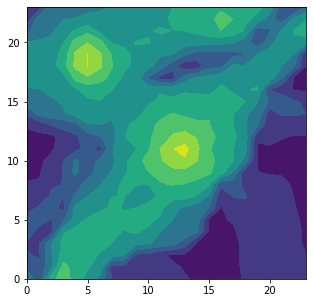

99


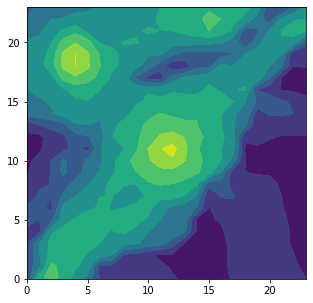

100


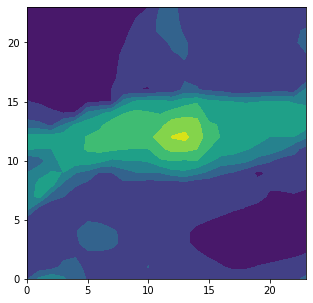

101


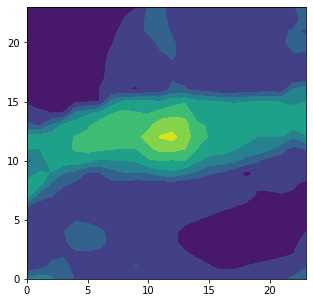

102


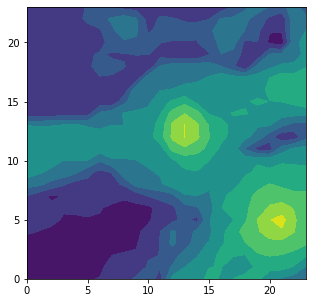

103


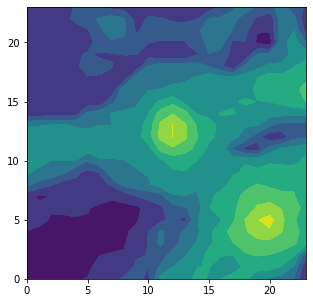

104


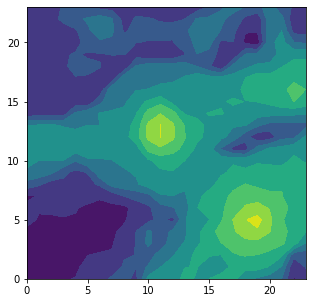

105


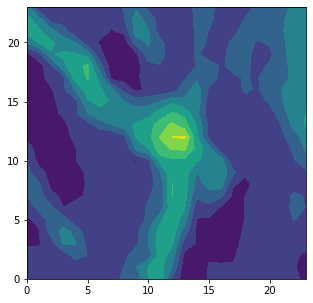

106


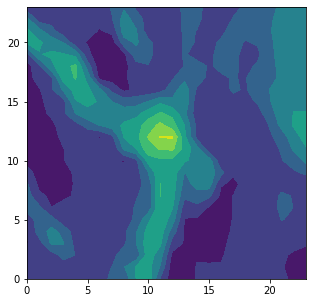

107


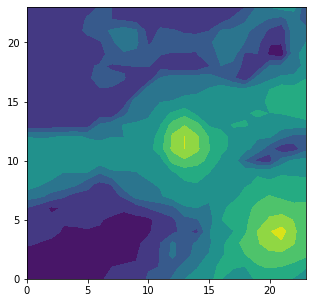

108


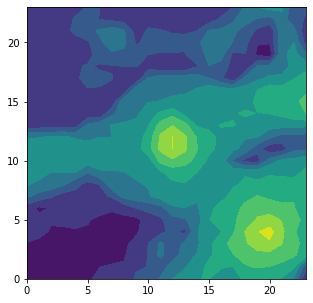

109


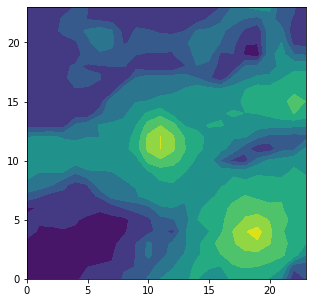

110


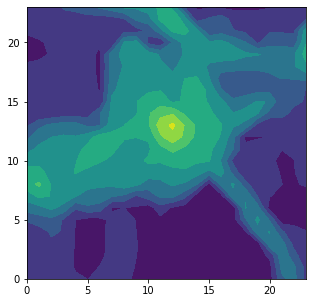

111


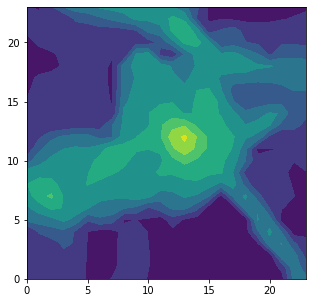

112


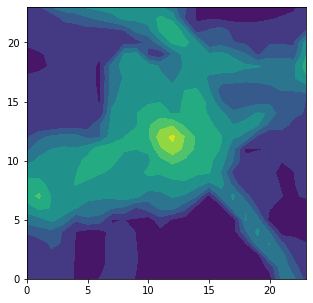

113


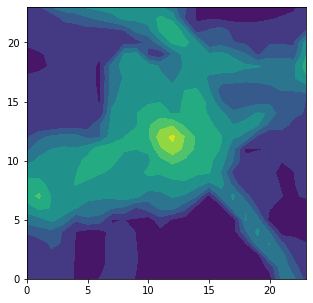

114


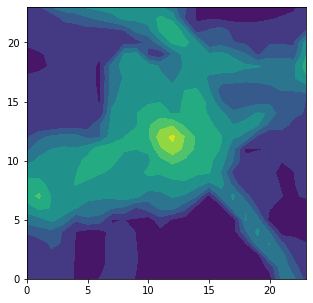

115


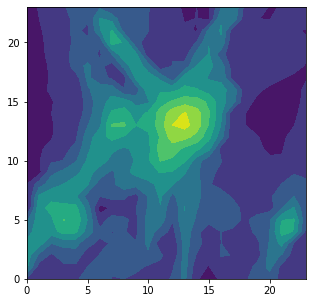

116


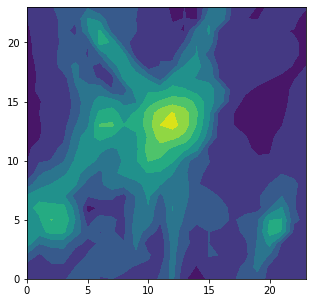

117


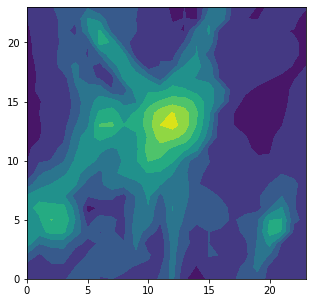

118


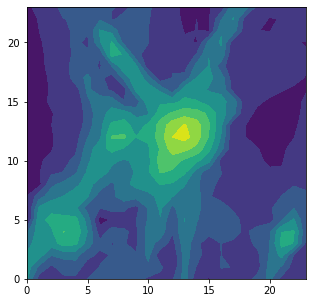

119


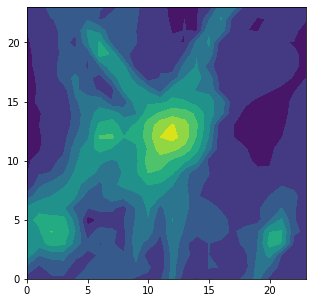

120


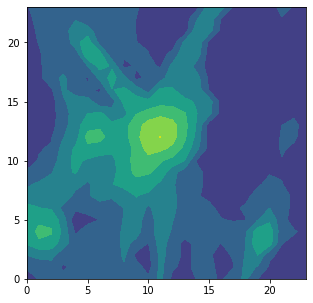

121


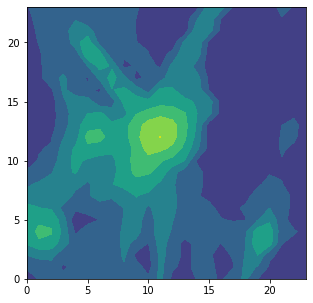

122


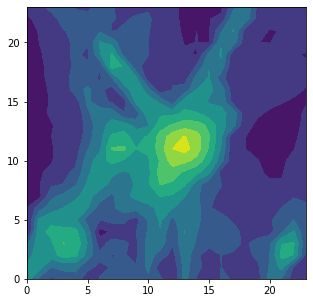

123


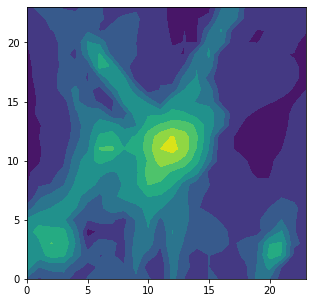

124


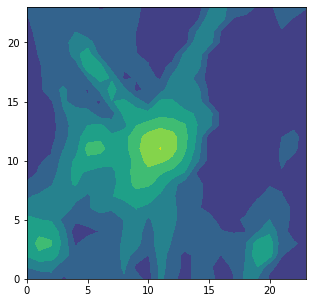

125


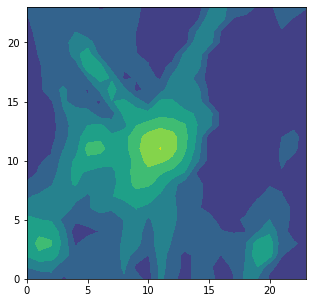

126


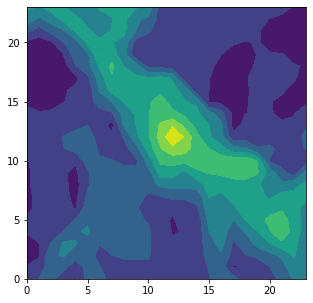

127


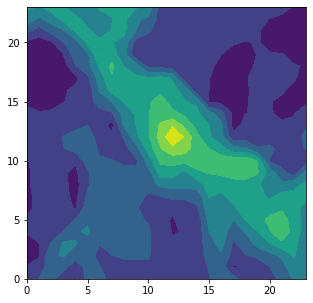

128


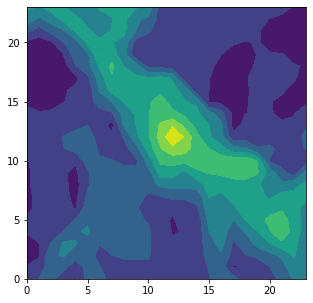

129


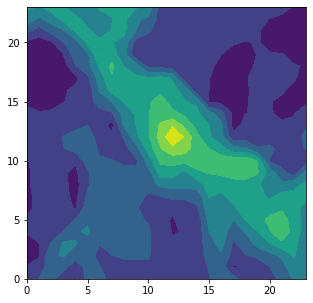

130


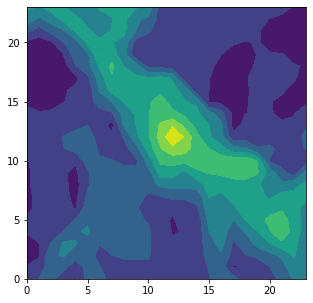

131


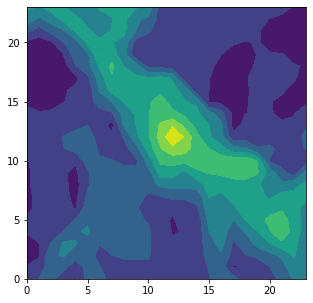

132


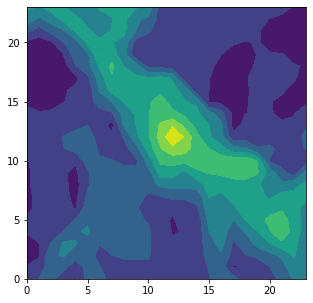

133


In [154]:
for ix in range(len(clusters_np)):
    plt.figure(figsize=[5,5])
    plt.contourf(clusters_np[ix,:,:])
    plt.show()
    print(ix)

In [86]:


ix = 0
#dens_mat_2d[-12+ix:ix+12]
print(-12+ix)
print(ix+12)

-12
12
